In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 


In [4]:
df=pd.read_csv('eval_data.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df.isnull().any()

status_id           False
status_type         False
status_published    False
num_reactions       False
num_comments        False
num_shares          False
num_likes           False
num_loves           False
num_wows            False
num_hahas           False
num_sads            False
num_angrys          False
Column1              True
Column2              True
Column3              True
Column4              True
dtype: bool

c:\Users\diyab\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\diyab\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
c:\Users\diyab\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\diyab\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
c:\Users\diyab\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\diyab\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctio

<Axes: >

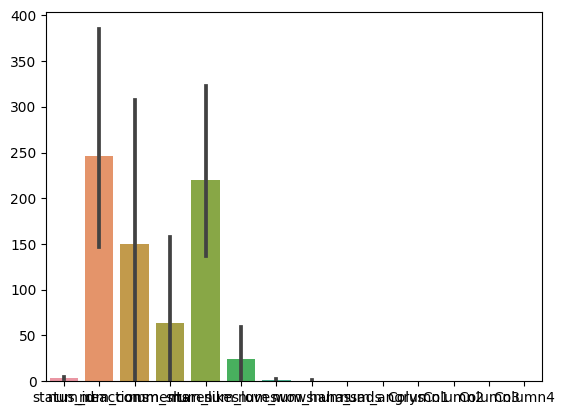

In [9]:
sns.barplot(data=df.head())

Constructing the correlation heatmap of the given problem

C:\Users\diyab\AppData\Local\Temp\ipykernel_20820\3803735512.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True)


<Axes: >

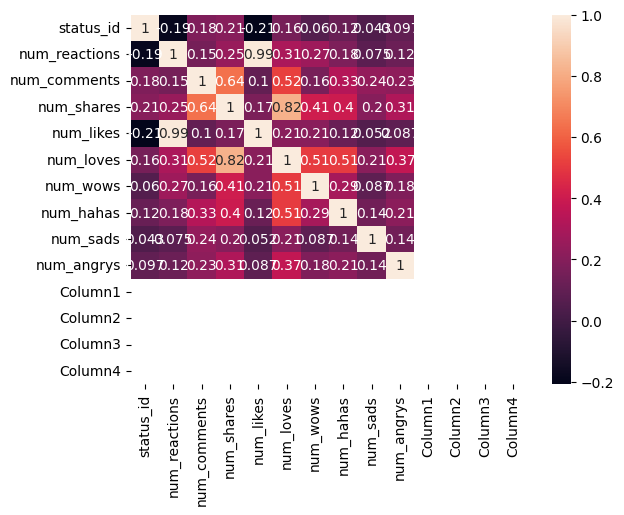

In [10]:
sns.heatmap(data=df.corr(),annot=True)

<Axes: ylabel='Count'>

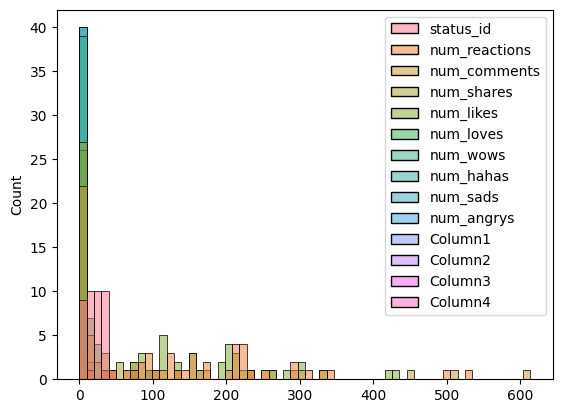

In [11]:
sns.histplot(data=df.head(40))

We can see that the columns 1,2,3 do not contain any type of data. So we can drop those columns from consideration in model building. In addition we don't also consider the status_published data because it will not be useful to us in model building.

In [15]:
maindata=pd.DataFrame(data=df,columns=['status_id','status_type','num_reactions','num_comments',	'num_shares','num_likes','num_loves',	'num_wows',	'num_hahas',	'num_sads',	'num_angrys'])

In [16]:
maindata

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,529,512,262,432,92,3,1,1,0
1,2,photo,150,0,0,150,0,0,0,0,0
2,3,video,227,236,57,204,21,1,1,0,0
3,4,photo,111,0,0,111,0,0,0,0,0
4,5,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,89,0,0,89,0,0,0,0,0
7046,7047,photo,16,0,0,14,1,0,1,0,0
7047,7048,photo,2,0,0,1,1,0,0,0,0
7048,7049,photo,351,12,22,349,2,0,0,0,0


<Axes: >

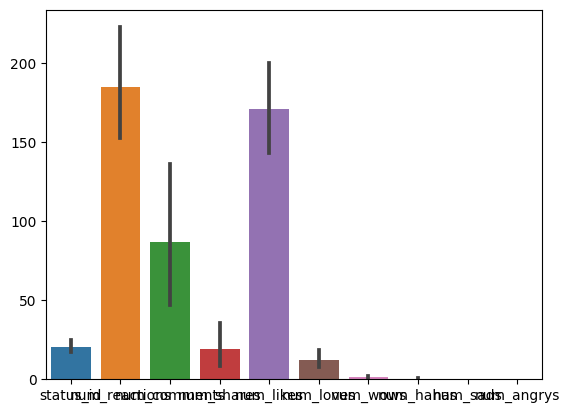

In [17]:
sns.barplot(data=maindata.head(40))

From the above barplot we can say that the maindata dataframe still has attributes that cannot be taken into consideration in model building since they are almost negligeble. So we remove the number of angrys and sads,hahas and wows.

In [31]:
maindat=pd.DataFrame(data=df,columns=['status_id','num_reactions','num_comments',	'num_shares','num_likes','num_loves'])
maindat

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves
0,1,529,512,262,432,92
1,2,150,0,0,150,0
2,3,227,236,57,204,21
3,4,111,0,0,111,0
4,5,213,0,0,204,9
...,...,...,...,...,...,...
7045,7046,89,0,0,89,0
7046,7047,16,0,0,14,1
7047,7048,2,0,0,1,1
7048,7049,351,12,22,349,2


<Axes: >

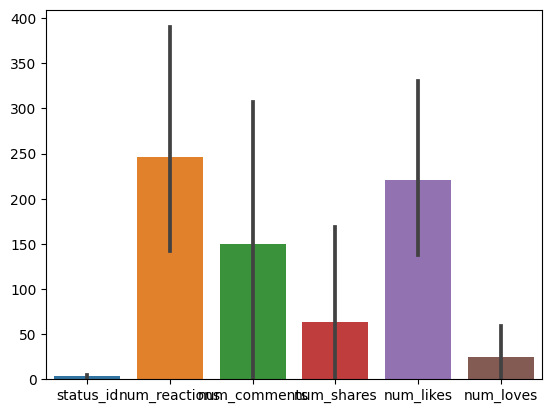

In [32]:
sns.barplot(maindat.head())

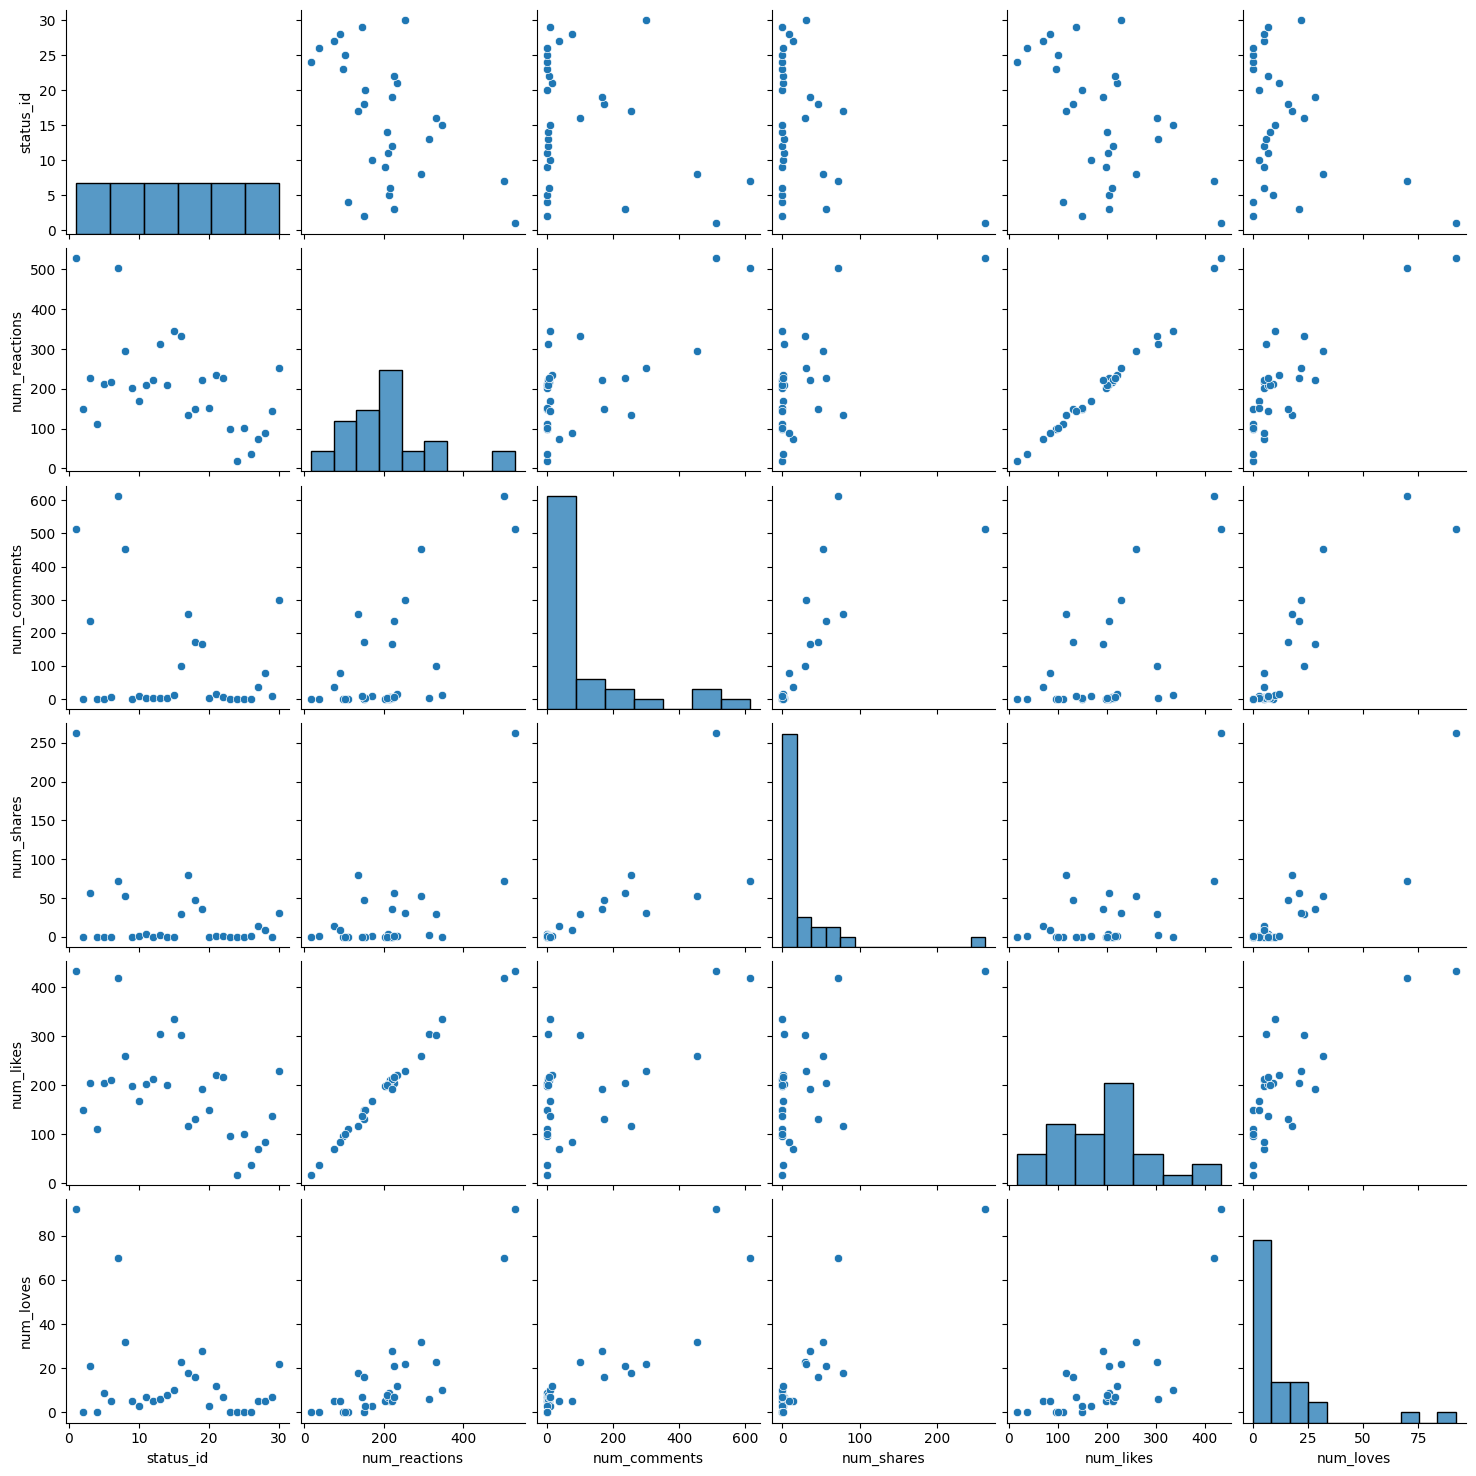

In [33]:
sns.pairplot(data=maindat.head(30))

Now we have to first apply the min-max scaler before training the dataset on our model data-maindat.

In [34]:
from sklearn import preprocessing

In [35]:
scaler = preprocessing.MinMaxScaler()

dfTest = maindat
min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(dfTest[col])),columns=[col])
    return df
dfTest

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves
0,1,529,512,262,432,92
1,2,150,0,0,150,0
2,3,227,236,57,204,21
3,4,111,0,0,111,0
4,5,213,0,0,204,9
...,...,...,...,...,...,...
7045,7046,89,0,0,89,0
7046,7047,16,0,0,14,1
7047,7048,2,0,0,1,1
7048,7049,351,12,22,349,2


In [51]:
maindf=pd.DataFrame(data=maindat,columns=['status_id','num_reactions'])

In [52]:
X=maindf.iloc[:,0:-1]
Y=maindf.iloc[:,-1]

In [59]:
X.dtypes

status_id    int64
dtype: object

In [53]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 4): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

c:\Users\diyab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\diyab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\diyab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
import matplotlib.pyplot as plt

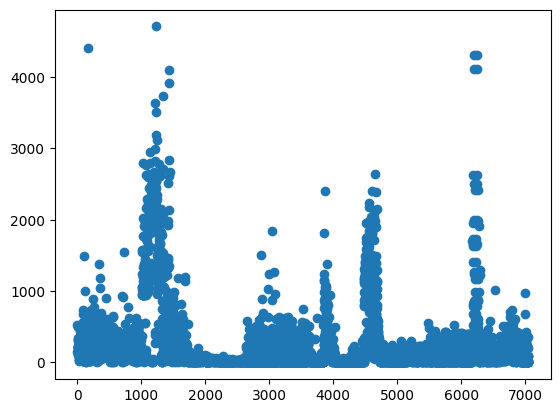

In [57]:
plt.scatter(X,Y)
plt.show()

c:\Users\diyab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


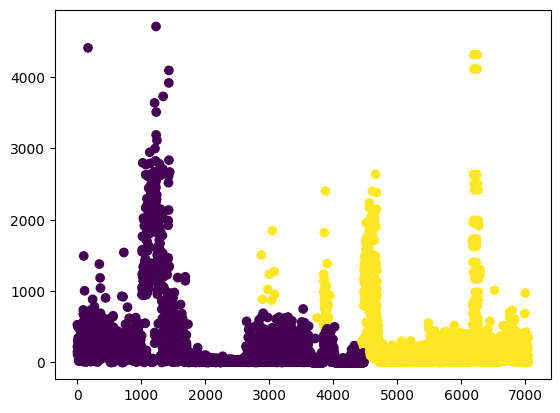

In [61]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(maindf)

plt.scatter(X, Y, c=labels)
plt.show()

c:\Users\diyab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


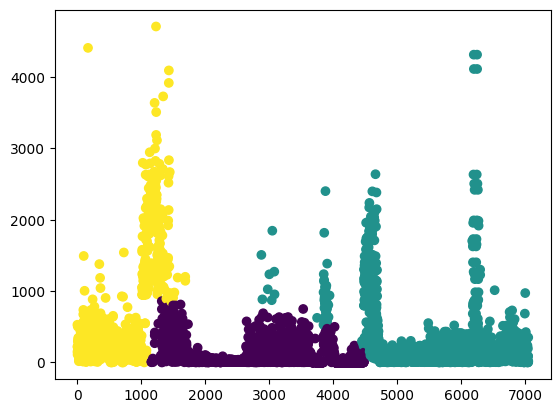

In [66]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(maindf)

plt.scatter(X, Y, c=labels)
plt.show()

c:\Users\diyab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


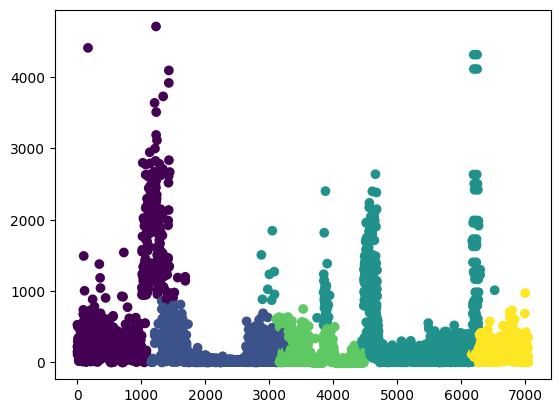

In [67]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(maindf)

plt.scatter(X, Y, c=labels)
plt.show()

c:\Users\diyab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


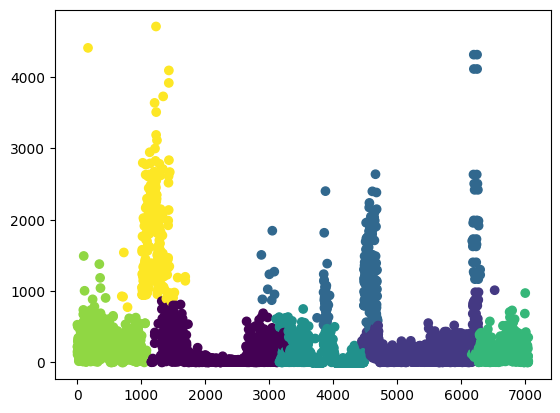

In [69]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(maindf)

plt.scatter(X, Y, c=labels)
plt.show()

c:\Users\diyab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


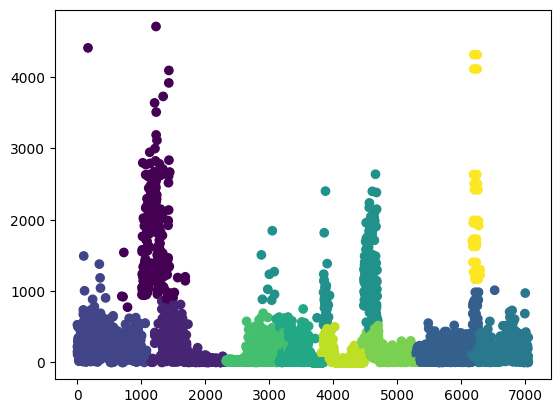

In [68]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(maindf)

plt.scatter(X, Y, c=labels)
plt.show()

Hence the optimal Number of Clusters is 3.